In [25]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re


In [24]:
pip install tensorflow

     |████████████████████████████████| 479.6 MB 20 kB/s s eta 0:00:01
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
     |████████████████████████████████| 5.6 MB 59.0 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 4.8 MB 60.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 59.7 MB/s eta 0:00:01
  Using cached protobuf-4.25.1-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
     |████████████████████████████████| 5.3 MB 61.1 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 56.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 32.8 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 39.7 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 2.9 MB/s  eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-

In [26]:
d1=pd.read_csv('Restaurant reviews.csv')

In [27]:
d1.shape

(14678, 2)

In [28]:
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content


def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)

    content = remove_stopwords(content)
    return content

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /config/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [31]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [32]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /config/nltk_data...


True

In [33]:
d1['Review_Final']=d1['Review Text'].apply(review_to_words)

In [34]:
d1.head()

,Review Text,Review,Review_Final
0,The man who is foodie like me for him arabian ...,5,man foodie like arabian master nice place envi...
1,This place is too much comfortable & food is d...,4,place much comfortable food delicious every it...
2,I check it out like a second home of mine...fe...,3,check like second home mine feel frequent rela...
3,"you guys are awesome & I just love your ""offer...",5,guy awesome love offer pizza tasty reasonablep...
4,Went there after referred by a friend. Tried t...,5,went referred friend tried cheese cream pasta ...


In [35]:
def fun(val):
    if val<=1:
        return 'poor'
    elif ((val>1) & (val<=3)):
        return 'average'
    else:
        return 'good'


In [36]:
d1['review_cat']=d1['Review'].apply(fun)

In [37]:
X=d1['Review_Final']
Y=d1['review_cat']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.2, random_state=0)

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Bag of Words

In [41]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

1. Multinomial Naive Bayes

accuracy:   0.837
Confusion matrix, without normalization


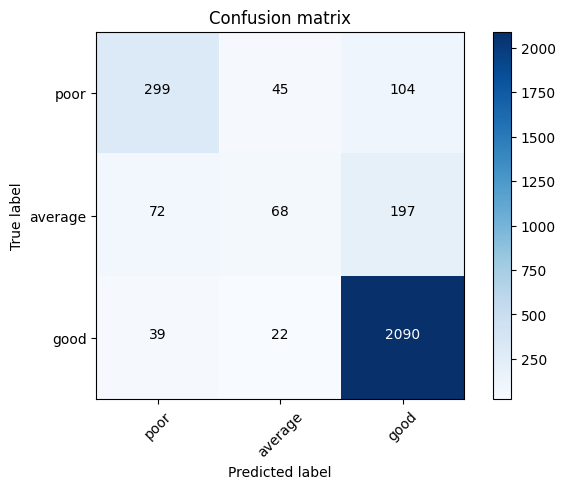

In [42]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['poor', 'average','good'])
plot_confusion_matrix(cm, classes=['poor', 'average','good'])

2. Multinomial Logistic Regression

accuracy:   0.844
Confusion matrix, without normalization


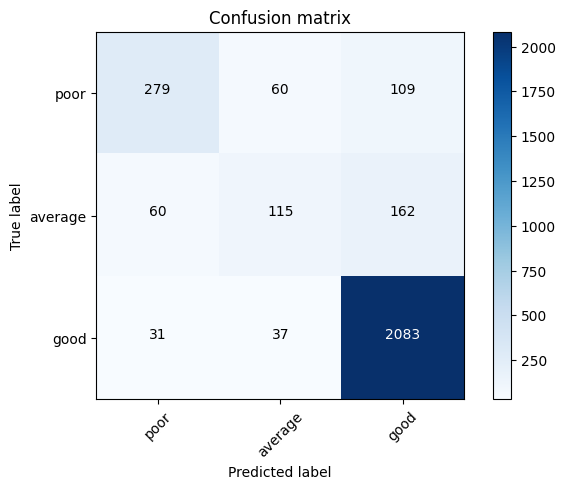

In [35]:
from sklearn.linear_model import LogisticRegression
mlr = LogisticRegression(multi_class='multinomial')
mlr.fit(count_train, y_train)
pred = mlr.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['poor', 'average','good'])
plot_confusion_matrix(cm, classes=['poor', 'average','good'])

3. Decision Tree Classifier

accuracy:   0.785
Confusion matrix, without normalization


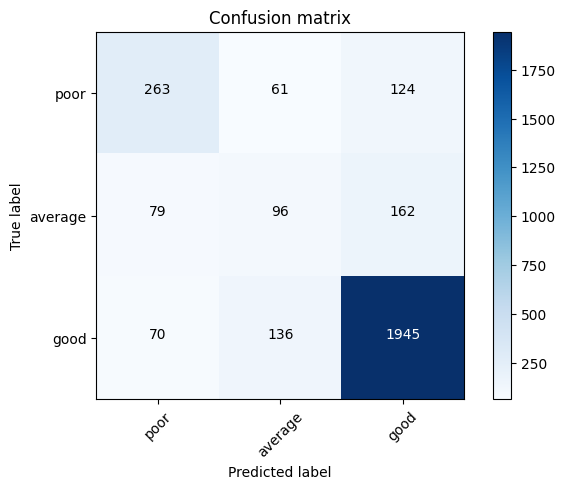

In [36]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(count_train, y_train)
pred = dtc.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['poor', 'average','good'])
plot_confusion_matrix(cm, classes=['poor', 'average','good'])

4. Random Forest Classifier

accuracy:   0.827
Confusion matrix, without normalization


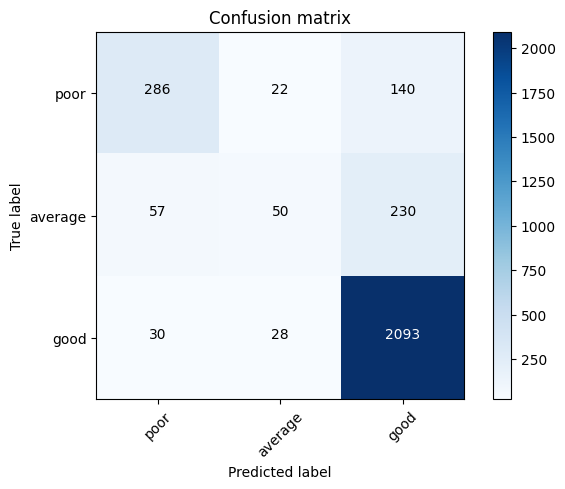

In [37]:
rfc = RandomForestClassifier()
rfc.fit(count_train, y_train)
pred = rfc.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['poor', 'average','good'])
plot_confusion_matrix(cm, classes=['poor', 'average','good'])

TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.75)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

1. Multinomial Naive Bayes

accuracy:   0.787
Confusion matrix, without normalization


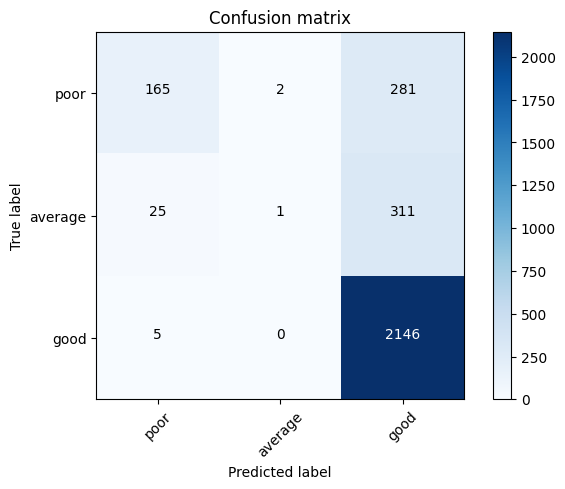

In [59]:
mnb = MultinomialNB()
mnb.fit(tfidf_train_2, y_train)
pred = mnb.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['poor', 'average','good'])
plot_confusion_matrix(cm, classes=['poor', 'average','good'])

2. Decision Tree Classifier

accuracy:   0.794
Confusion matrix, without normalization


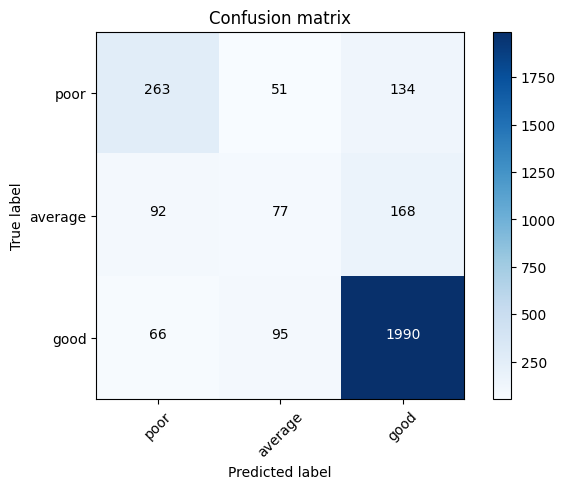

In [60]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(tfidf_train_2, y_train)
pred = dtc.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['poor', 'average','good'])
plot_confusion_matrix(cm, classes=['poor', 'average','good'])

3. Multinomial Logistic Regression

accuracy:   0.844
Confusion matrix, without normalization


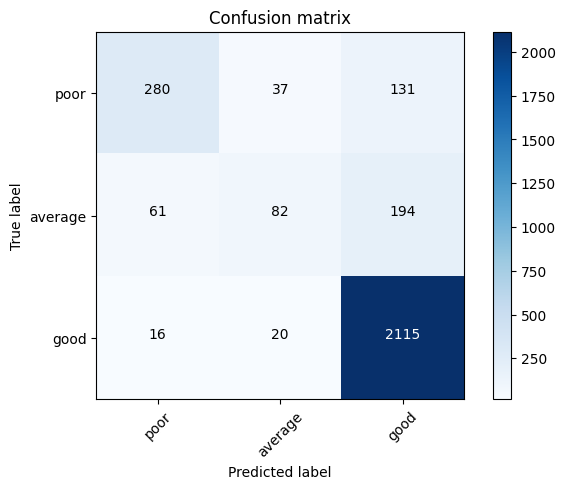

In [61]:
from sklearn.linear_model import LogisticRegression
mlr = LogisticRegression(multi_class='multinomial')
mlr.fit(tfidf_train_2, y_train)
pred = mlr.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['poor', 'average','good'])
plot_confusion_matrix(cm, classes=['poor', 'average','good'])

4. Random Forest Classifier

accuracy:   0.827
Confusion matrix, without normalization


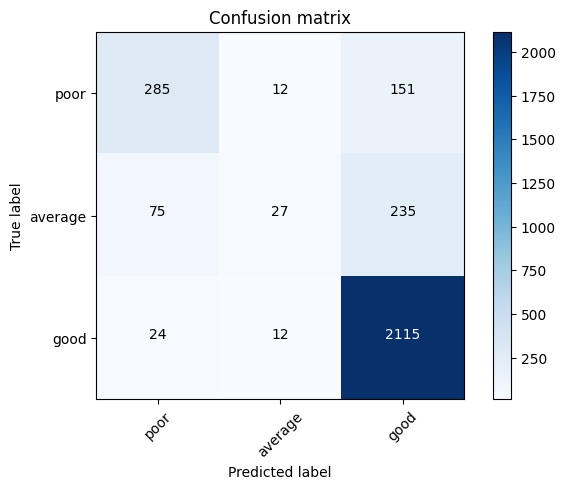

In [62]:
rfc = RandomForestClassifier()
rfc.fit(tfidf_train_2, y_train)
pred = rfc.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['poor', 'average','good'])
plot_confusion_matrix(cm, classes=['poor', 'average','good'])

In [67]:
text =["pu** mara service,worst experience of my life.. fuck dis place."]
test = tfidf_vectorizer.transform(text)
pred1=mnb.predict(test)[0]
pred1

'poor'

In [11]:
import pickle


In [43]:
with open('model_pkl', 'wb') as files:
    pickle.dump(mnb, files)